#Speech Processing Lab - Week 5 Phase 1

Name: S U Swakath 

Roll number: 180020036

Google Colab Link : https://colab.research.google.com/drive/1dj7q9y0sFrioMEdDyDoWFULNVXR2bPRm?usp=sharing

**Aim**
* To study different sound units present in majority of Indian languages.
* To understand the production mechanism of each sound unit.
* To learn the time domain and frequency domain characteristics of different sound units.

**Introduction**

Speech generated from the speech production system consists of a sequence of basic sound units of a particular language. The need for studying the basic alphabet set (orthographic representation) of any language is to be able to express message in written form. On the similar lines we need to study the basic sound units set ( acoustic representation) of any language for producing message in oral form. Every language is provided with unique set of alphabet set and sound units set. In most of the Indian languages we have about 40-50 distinct alphabets set and also of nearly same number of sound units set.

The process of learning to speak in a particular languages involves getting to know about the valid combination that have some meaning and then using them in proper order, resulting in what is called speech signal. Whether the remaining is formal and informal, over time we get hold into the basic sound units of a particular language and some words that enable us to produce speech in a particular language, with respect to time the vocabulary of words in that languages increases. Thus one of the important steps in speech processing is to get a feel about the different sounds used for speech production.

From signal processing point of view the different sounds have different time, frequency and time-frequency representations and hence make them perceptually distinct. These difference give a basis to classify the sound into different categories. Two such categories are vowels and stop consonants which will be discussed in this lab.

**Short and Long vowel sounds**

Vowels are voiced sounds which are produced by the vibrations of the glottis.
From the production process point of view there is no distinction between short and long vowels, except that the duration of production will be longer typically nearly double that of short vowels. 

**Diphthongs**

In case of diphthongs, as the name indicates, two vowel sounds are produced in succession without any pause. The production process is such that the vocal tract shape is initially producing the first vowel and midway during the production of the first vowel it changes the shape to produce the other vowel.

**Stop Consonants**

During the production of stop consonants the vocal tract is completely closed at some point, somewhere along the length of the vocal tract and suddenly released. The stop consonants are further classified into different cases based on two criteria, namely, place of articulation (POA) and manner of articulation(MOA). Here we choose the POA called Bilabial  and analyse all sounds corresponding to different MOA.


#Problem A

Short vowels, Long vowels and Diphthongs

* Record the sounds of any one short vowel sound, long vowel sound and a diphthong (Also, record the two sounds present in the diphthong). (/a/, /A/, /e/, /ai/)
* Plot the time domain waveform, magnitude spectrum and the spectrogram for each of the above sounds.
* Inspect each of the above plots and write your observations comparing them.


**Procedure**
1.   Record the word the vowels using wavesurfer, save the recoring in .wav format and upload it in drive and access it in colab.
2. Plot the time domain plot, magnitude spectrum, and spectrofram for each of the audio.

In [1]:
# Mounting Google Drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [27]:
# Changing directory
%cd /content/gdrive/MyDrive/Sem6/Speech Lab/Week5_Phase1
!ls

/content/gdrive/MyDrive/Sem6/Speech Lab/Week5_Phase1
aa.wav	a.wav	b.wav  ph.wav  Week-5_Phase-1.ipynb
ai.wav	bh.wav	e.wav  p.wav


In [39]:
# Importing Libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq,fftshift
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
import soundfile as sf
from matplotlib import cm
#Functions 
# Time domain plot
# Plotting time domain plot of the audio
def timePlot (sound,fs,name):
  plt.figure(figsize=(20,3))
  librosa.display.waveplot(audio, sr=fs);
  plt.title("Time Domain Plot of Speech Signal (Fs = " +str(fs)+" Hz)")
  plt.xlabel('Time (sec)')
  plt.ylabel('Amplitude')
  plt.show()

# Magnitude spectrum plot function
def magnitudeSpectrum(sound):
    
  # Computing the FFT of the sound
  sound_len = sound.shape[0]
  sound_fft = fft(sound)/sound_len

  # Computing the frequency array
  freqs = fftfreq(sound_len, 1/fs)
  
  freqs = freqs[0:sound_len//2]
  fft_db = 2*np.log10(np.abs(sound_fft[0:sound_len//2]))
  return freqs,fft_db

def plots (audio, name, fs,frame_rate=8):
  
  f,f_db = magnitudeSpectrum(audio)

  # Plotting time domain plot of the audio
  plt.figure(figsize=(30,6))
  plt.subplot(1,3,1)
  librosa.display.waveplot(audio, sr=fs);
  plt.title("Time Domain Plot of Speech Signal")
  plt.xlabel('Time (sec)')
  plt.ylabel('Amplitude')

  #magnitude spectrum
  plt.subplot(1,3,2)
  plt.plot(f,f_db)
  plt.title("Magnitude spectrum")
  plt.xlabel("Frequency (in Hz)")
  plt.ylabel("Amplitude (in dB)")
  
  # Spectrogram
  plt.subplot(1,3,3)
  plt.suptitle("Plot for sound " +name + " (Fs = " +str(fs)+" Hz)" )
  D = librosa.stft(audio, n_fft=512, win_length=128, hop_length=frame_rate)
  S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
  librosa.display.specshow(S_db, x_axis='s', y_axis='linear', sr=fs,hop_length=frame_rate, cmap=cm.gnuplot2)
  plt.title("Spectrogram")
  plt.colorbar()
  plt.show()




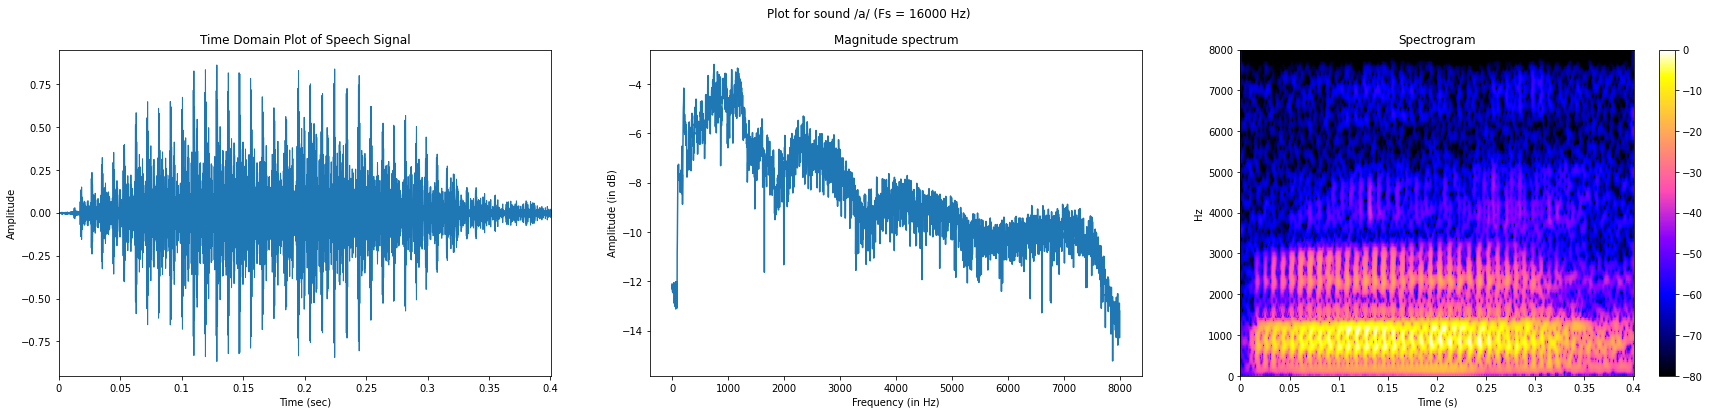

--- 



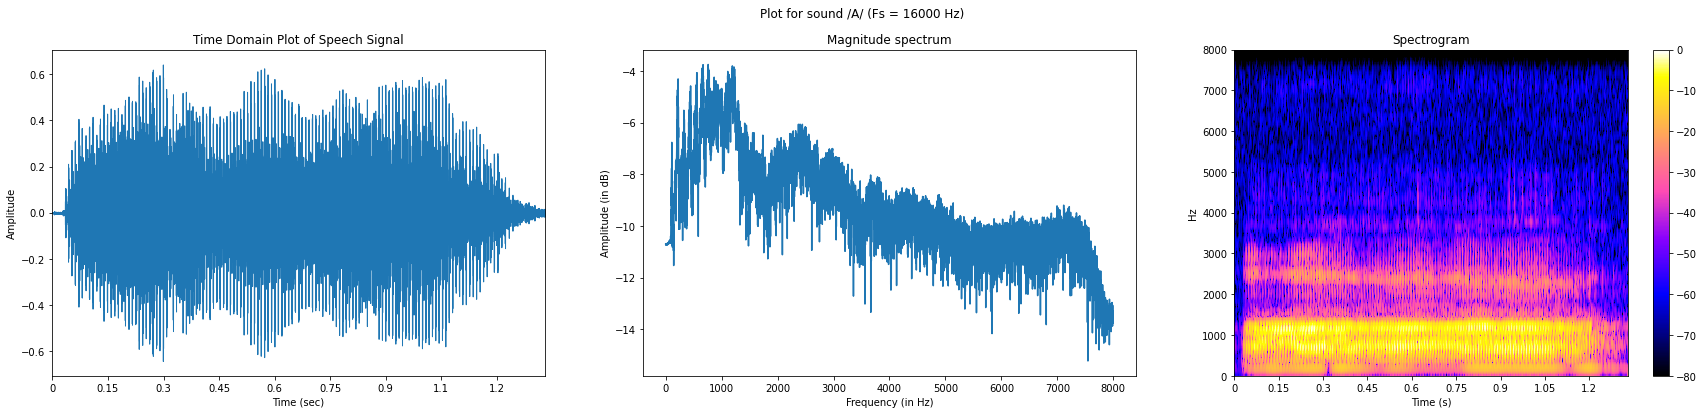

--- 



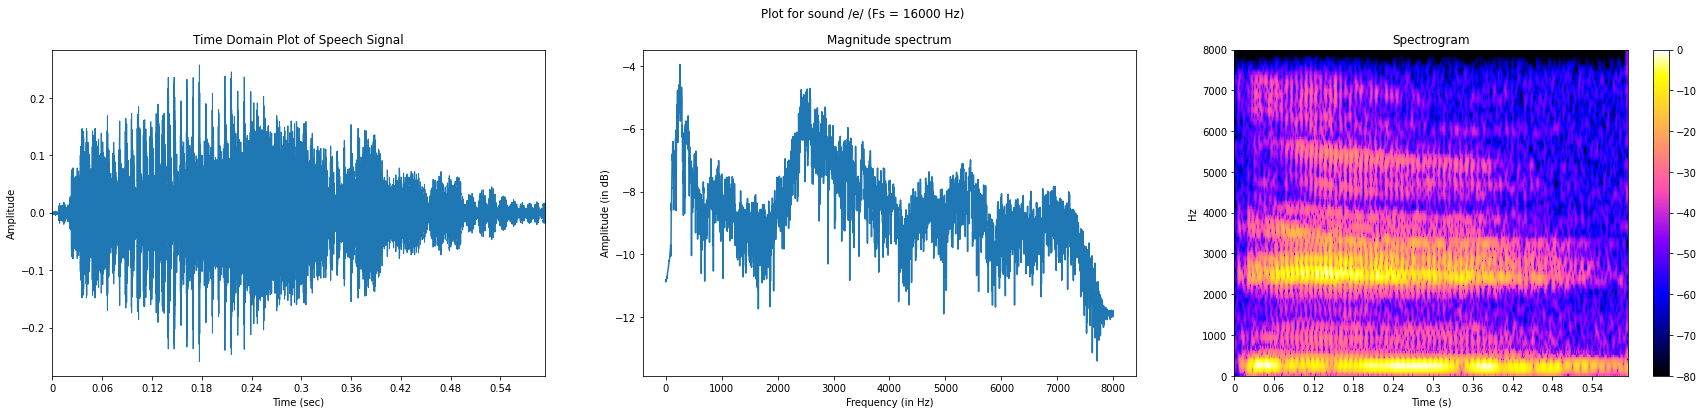

--- 



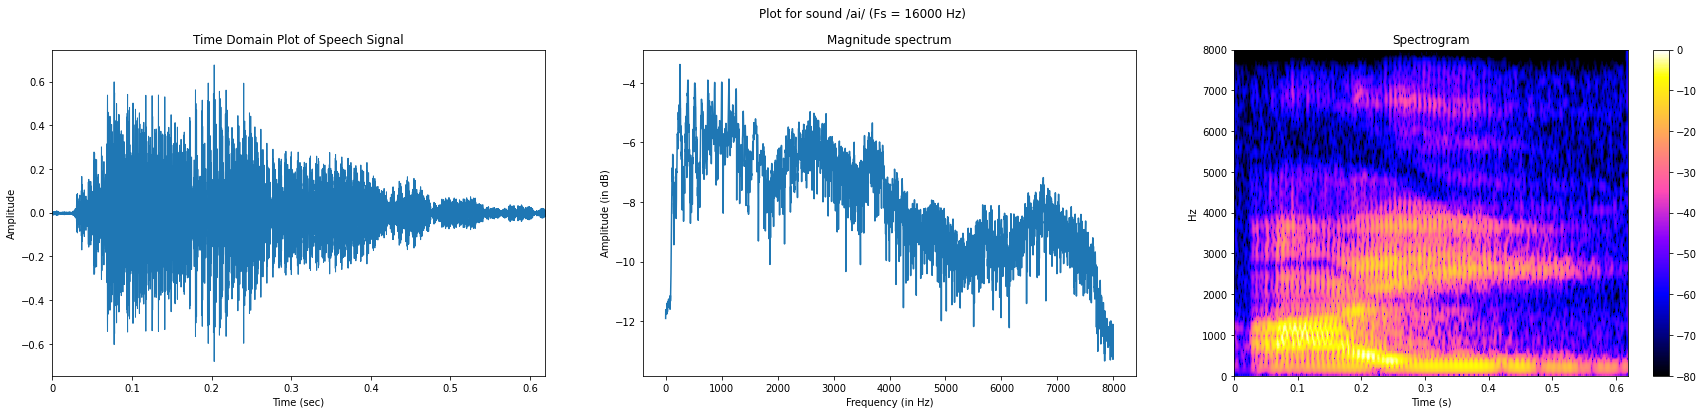

--- 



In [40]:
# Loading the audio into colab. Fs = 16kHz
a, fs = librosa.load("a.wav", sr = 16000)
A, fs = librosa.load("aa.wav", sr = 16000)
e, fs = librosa.load("e.wav", sr = 16000)
ai, fs = librosa.load("ai.wav", sr = 16000)
vowels = [a,A,e,ai]
vowelNames = ['/a/','/A/','/e/','/ai/']

i = 0
for curVow in vowels:
  plots(curVow,vowelNames[i],fs)
  print("--- \n")
  i = i+1

**Observations**

* The sound /a/ is half the time period of /A/, still both have the similar frequency domain plots. This signifies that the duration of the vowel does not affect it's frequency property.

* In case of diphthongs /ai/, the initial portion materials with /a/ and the later portion material with /e/. One transition of vocal tract shape from /a/ to /e/ can be clearly seen in the spectrogram.

#Problem B

Stop Consonants

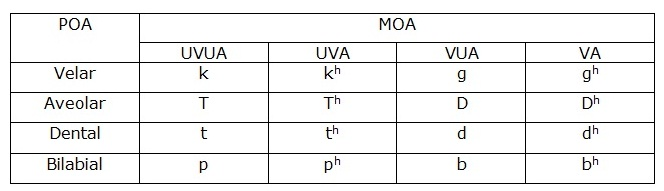

* Pick up any one of the POA(Position of Articulation) types and record the sounds present in the respective row for all the MOA(Manner of Articulation) types.
* Plot the time domain waveform, the magnitude spectrum and the spectrogram for each of the above sounds.
* Inspect the above plots and describe the various sub phonetic events that take place, their relative duration and how they vary across different kinds of MOA.

**Procedure**
1. Record the sound /p/, /ph/, /b/ , and /bh/ using wavesurfer and upload it in to google drive and access it in colab.
2. Plot the time domain plot, magnitude spectrum and spectogram of each sound.

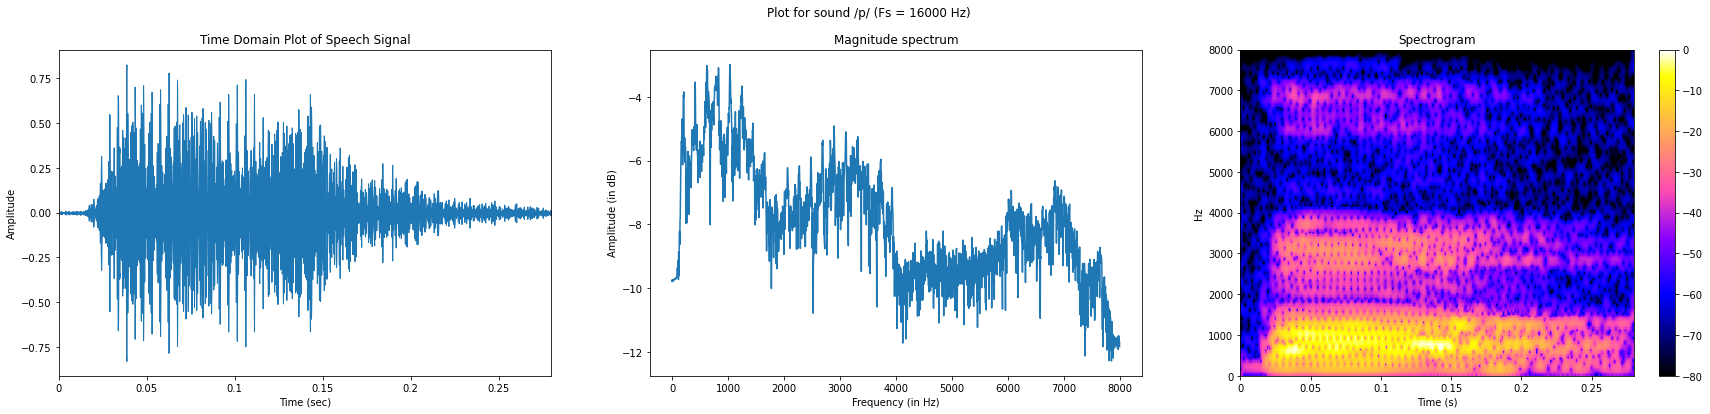

--- 



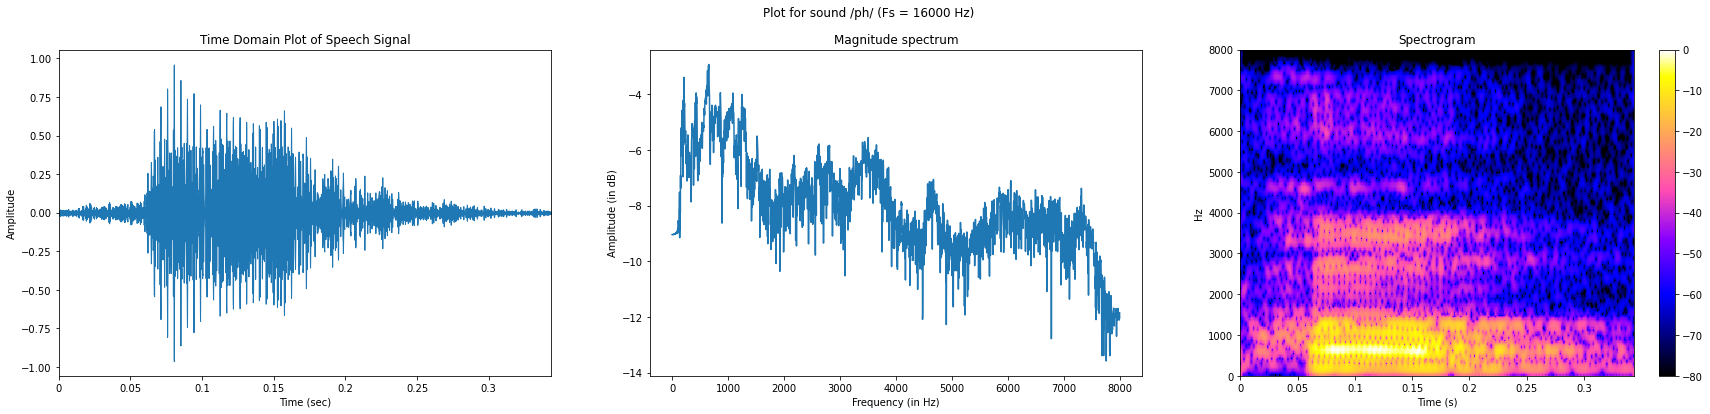

--- 



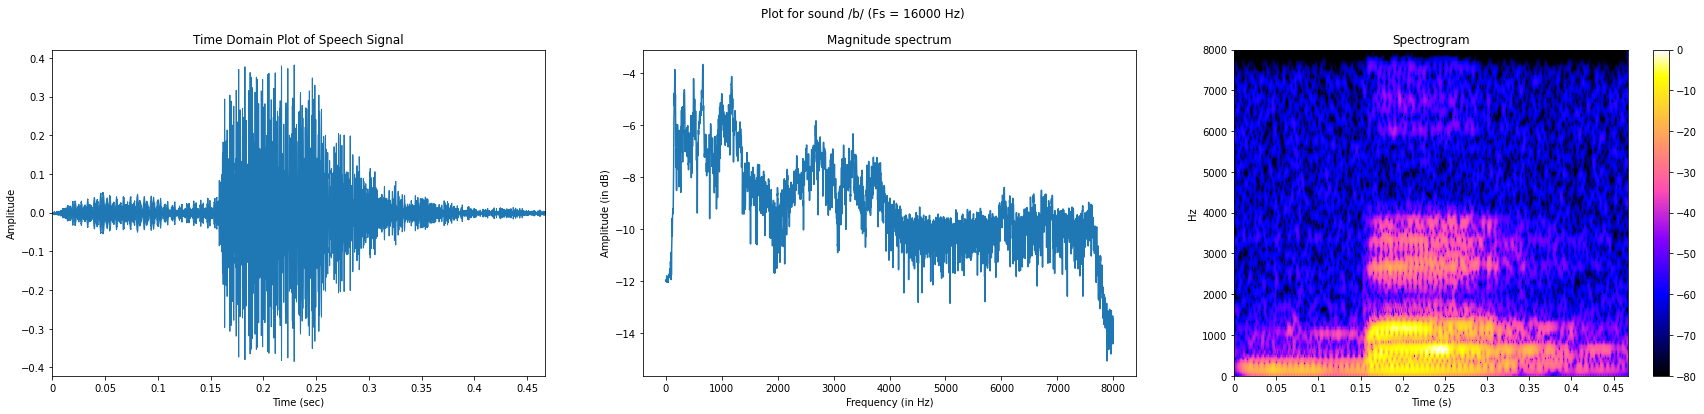

--- 



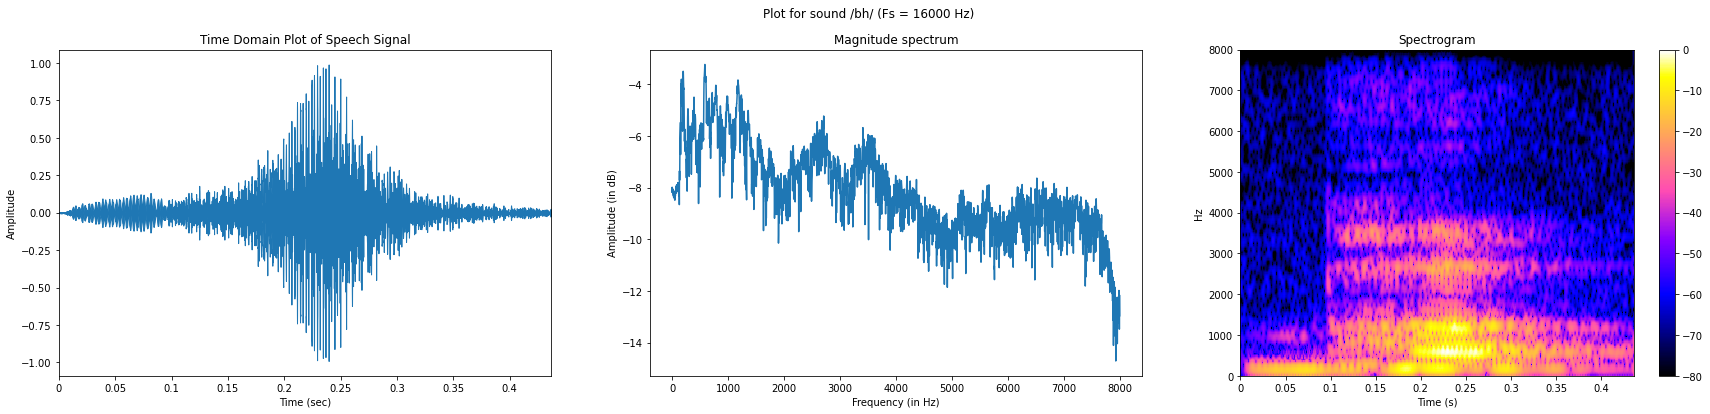

--- 



In [41]:
p, fs = librosa.load("p.wav", sr = 16000)
ph, fs = librosa.load("ph.wav", sr = 16000)
b, fs = librosa.load("b.wav", sr = 16000)
bh, fs = librosa.load("bh.wav", sr = 16000)

stopCons = [p,ph,b,bh]
stopConsNames = ['/p/','/ph/','/b/','/bh/']

i = 0
for curCons in stopCons:
  plots(curCons,stopConsNames[i],fs)
  print("--- \n")
  i = i+1

**Observation**

The above plots corresponds to stop consonants that have Bilabial as position of articulation. 

**UVUA - /p/**

1. We can clearly see that /p/ does not show clear periodicity and hence classified as unvoiced
2. Also the sound is not aspirated as the spectrogram shows high frequency content for a very short duration.

**UVA - /ph/**
1. We can clearly see that /ph/ does not show clear periodicity and hence classified as unvoiced
2. The sound is aspirated as the spectrogram shows high frequency content for a very long duration.
3. The sub-phonetic events are observable very well in the spectrogram - the closure with no speech activity, the release with a burst of energy and long duration of frication (high frequency content).

**VUA - /b/**
1. In case of sound /b/ we observe that there is voicing as the short segment waveform has some periodicity. The low amplitude nearly periodic signal is present in the all sub-phonetic events. This causes the low frequency peaks in the magnitude spectrum.
2. The sound /b/ is not aspirated as the spectrogram shows high frequency content for a very short duration.

**VA - /bh/**
1. In case of sound /bh/ we observe that there is voicing as the short segment waveform has  some periodicity. The low amplitude nearly periodic signal is present in the all sub-phonetic events. This causes the low frequency peaks in the magnitude spectrum.

2. The sound /bh/ is aspirated as the spectrogram shows high frequency content for a longer duration as compared to the VUA sound /b/.

3. The sub-phonetic events are observable very well in the spectrogram - the closure with only the low amplitude periodic signal, the release with a burst of energy and long duration of frication (high frequency content). 


#References and Tools

1. For theory concepts :- https://vlab.amrita.edu/index.php?sub=59&brch=164&sim=614&cnt=1
2. Wavesurfer:- https://sourceforge.net/projects/wavesurfer/